In [1]:
!pip install torch transformer-lens datasets

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.0/192.0 kB 11.0 

In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.26.4


In [3]:
from huggingface_hub import login
hf_token ="hf_"
# Login to Hugging Face
login(token=hf_token)

✓ Successfully authenticated with Hugging Face


In [4]:
from transformer_lens import HookedTransformer
import torch
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = HookedTransformer.from_pretrained(
        "google/gemma-2-2b-it",
        device=device,
        dtype=torch.float16
    )

model.eval()

config.json:   0%|          | 0.00/838 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Loaded pretrained model google/gemma-2-2b-it into HookedTransformer


HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (blocks): ModuleList(
    (0-25): 26 x TransformerBlock(
      (ln1): RMSNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln1_post): RMSNorm(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): RMSNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2_post): RMSNorm(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): GroupedQueryAttention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
        (hook_rot_k): HookPoint()
        (hook_rot_q): HookPoint()
      )
      (mlp): GatedMLP(
        (hook_pre): HookPoint()
        (hook_pre_linear): HookPoint()
        (

In [18]:
text = "The girl is an engineer."
tokens = model.to_tokens(text, prepend_bos=False)
str_tokens = model.to_str_tokens(text, prepend_bos=False)

logits, cache = model.run_with_cache(tokens, return_type="logits")
print(list(cache.keys())[:50])

['hook_embed', 'blocks.0.hook_resid_pre', 'blocks.0.ln1.hook_scale', 'blocks.0.ln1.hook_normalized', 'blocks.0.attn.hook_q', 'blocks.0.attn.hook_k', 'blocks.0.attn.hook_v', 'blocks.0.attn.hook_rot_q', 'blocks.0.attn.hook_rot_k', 'blocks.0.attn.hook_attn_scores', 'blocks.0.attn.hook_pattern', 'blocks.0.attn.hook_z', 'blocks.0.ln1_post.hook_scale', 'blocks.0.ln1_post.hook_normalized', 'blocks.0.hook_attn_out', 'blocks.0.hook_resid_mid', 'blocks.0.ln2.hook_scale', 'blocks.0.ln2.hook_normalized', 'blocks.0.mlp.hook_pre', 'blocks.0.mlp.hook_pre_linear', 'blocks.0.mlp.hook_post', 'blocks.0.ln2_post.hook_scale', 'blocks.0.ln2_post.hook_normalized', 'blocks.0.hook_mlp_out', 'blocks.0.hook_resid_post', 'blocks.1.hook_resid_pre', 'blocks.1.ln1.hook_scale', 'blocks.1.ln1.hook_normalized', 'blocks.1.attn.hook_q', 'blocks.1.attn.hook_k', 'blocks.1.attn.hook_v', 'blocks.1.attn.hook_rot_q', 'blocks.1.attn.hook_rot_k', 'blocks.1.attn.hook_attn_scores', 'blocks.1.attn.hook_pattern', 'blocks.1.attn.hook

In [22]:
def unembed(resid):  # resid: [batch, pos, d_model]
    return resid @ model.W_U + model.b_U  # -> [batch, pos, d_vocab]

# 1) Find candidate residual-stream activations
resid_keys = [k for k in cache.keys() if "resid" in k or "embed" in k]


In [23]:

keys_to_probe = [
]
for key in resid_keys:
    if "hook_resid_post" in key:
        keys_to_probe.append(key)    
print(keys_to_probe)

['blocks.0.hook_resid_post', 'blocks.1.hook_resid_post', 'blocks.2.hook_resid_post', 'blocks.3.hook_resid_post', 'blocks.4.hook_resid_post', 'blocks.5.hook_resid_post', 'blocks.6.hook_resid_post', 'blocks.7.hook_resid_post', 'blocks.8.hook_resid_post', 'blocks.9.hook_resid_post', 'blocks.10.hook_resid_post', 'blocks.11.hook_resid_post', 'blocks.12.hook_resid_post', 'blocks.13.hook_resid_post', 'blocks.14.hook_resid_post', 'blocks.15.hook_resid_post', 'blocks.16.hook_resid_post', 'blocks.17.hook_resid_post', 'blocks.18.hook_resid_post', 'blocks.19.hook_resid_post', 'blocks.20.hook_resid_post', 'blocks.21.hook_resid_post', 'blocks.22.hook_resid_post', 'blocks.23.hook_resid_post', 'blocks.24.hook_resid_post', 'blocks.25.hook_resid_post']


In [ ]:
layer_logits = {}
with torch.no_grad():
    for k in keys_to_probe:
        resid = cache[k]
        layer_logits[k] = unembed(resid)              # logits per layer
        # probs = layer_logits[k].softmax(dim=-1)     # optional

In [38]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

prompt = "The developer argued with the designer because _ did not like the design"
tokens = model.to_tokens(prompt, prepend_bos=False)
# print(f"tokens shape: {tokens.shape}")  # [1, seq_len]
tokens = tokens.to(device)
seq_len = tokens.shape[1]  # Fixed: 7, not len(tokens)=1
str_tokens = model.to_str_tokens(tokens)
# print(f"str_tokens len: {len(str_tokens)} = seq_len")

logits, cache = model.run_with_cache(tokens, return_type="logits")
# print(f"logits shape: {logits.shape}")

she_id = model.to_single_token(" she")
he_id = model.to_single_token(" he")

she_logits = logits[0, :, she_id]  # [seq_len]
he_logits = logits[0, :, he_id]    # [seq_len]
logit_diff = she_logits - he_logits  # [seq_len]

probs = F.softmax(logits[0], dim=-1)  # [seq_len, d_vocab]
positions = torch.arange(seq_len)     # Fixed: range(seq_len), e.g. tensor([0,1,2,3,4,5,6])
she_probs = probs[positions, she_id]  # [seq_len]
he_probs = probs[positions, he_id]    # [seq_len]

# print(f"positions: {positions}")
# print(f"she_probs shape: {she_probs.shape}")
# print(f"logit_diff shape: {logit_diff.shape}")

print("Position | Token | P(she) | P(he) | logit(she)-logit(he)")
for i, tok_str in enumerate(str_tokens):
    print(f"{i:2d}     | {tok_str:10s} | {she_probs[i]:.4f} | {he_probs[i]:.4f} | {logit_diff[i]:.4f}")


Position | Token | P(she) | P(he) | logit(she)-logit(he)
 0     | The        | 0.0000 | 0.0000 | -1.2617
 1     |  developer | 0.0000 | 0.0006 | -7.0508
 2     |  argued    | 0.0000 | 0.0500 | -7.6250
 3     |  with      | 0.0000 | 0.0009 | -7.7188
 4     |  the       | 0.0000 | 0.0004 | -5.5273
 5     |  designer  | 0.0000 | 0.0038 | -4.7383
 6     |  because   | 0.0034 | 0.0416 | -2.4922
 7     |  _         | 0.0000 | 0.0000 | -1.0137
 8     |  did       | 0.0000 | 0.0000 | -0.2227
 9     |  not       | 0.0000 | 0.0000 | -1.3574
10     |  like      | 0.0000 | 0.0000 | -0.8555
11     |  the       | 0.0000 | 0.0003 | -2.3555
12     |  design    | 0.0001 | 0.0004 | -1.9062


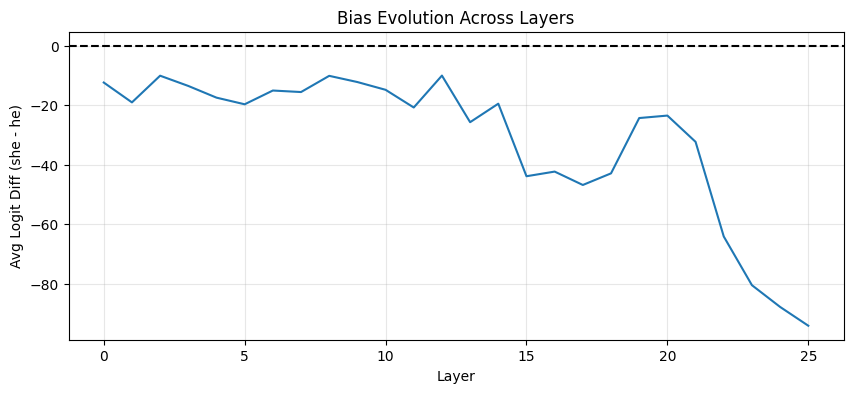

In [39]:
layer_biases = []
for layer in range(model.cfg.n_layers):
    resid = cache[f'blocks.{layer}.hook_resid_post']
    layer_logits = model.unembed(resid)[0]  # [seq_len, d_vocab]
    l_diff = layer_logits[:, she_id] - layer_logits[:, he_id]
    layer_biases.append(l_diff.mean().item())  # Avg over positions

plt.figure(figsize=(10, 4))
plt.plot(layer_biases)
plt.xlabel('Layer')
plt.ylabel('Avg Logit Diff (she - he)')
plt.title('Bias Evolution Across Layers')
plt.axhline(0, color='k', linestyle='--')
plt.grid(True, alpha=0.3)
plt.show()


In [36]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

prompt = "The developer argued with the designer because she did not like the design"
tokens = model.to_tokens(prompt, prepend_bos=False)
# print(f"tokens shape: {tokens.shape}")  # [1, seq_len]
tokens = tokens.to(device)
seq_len = tokens.shape[1]  # Fixed: 7, not len(tokens)=1
str_tokens = model.to_str_tokens(tokens)
# print(f"str_tokens len: {len(str_tokens)} = seq_len")

logits, cache = model.run_with_cache(tokens, return_type="logits")
# print(f"logits shape: {logits.shape}")

she_id = model.to_single_token(" she")
he_id = model.to_single_token(" he")

she_logits = logits[0, :, she_id]  # [seq_len]
he_logits = logits[0, :, he_id]    # [seq_len]
logit_diff = she_logits - he_logits  # [seq_len]

probs = F.softmax(logits[0], dim=-1)  # [seq_len, d_vocab]
positions = torch.arange(seq_len)     # Fixed: range(seq_len), e.g. tensor([0,1,2,3,4,5,6])
she_probs = probs[positions, she_id]  # [seq_len]
he_probs = probs[positions, he_id]    # [seq_len]

# print(f"positions: {positions}")
# print(f"she_probs shape: {she_probs.shape}")
# print(f"logit_diff shape: {logit_diff.shape}")

print("Position | Token | P(she) | P(he) | logit(she)-logit(he)")
for i, tok_str in enumerate(str_tokens):
    print(f"{i:2d}     | {tok_str:10s} | {she_probs[i]:.4f} | {he_probs[i]:.4f} | {logit_diff[i]:.4f}")


Position | Token | P(she) | P(he) | logit(she)-logit(he)
 0     | The        | 0.0000 | 0.0000 | -1.2617
 1     |  developer | 0.0000 | 0.0006 | -7.0508
 2     |  argued    | 0.0000 | 0.0500 | -7.6250
 3     |  with      | 0.0000 | 0.0009 | -7.7188
 4     |  the       | 0.0000 | 0.0004 | -5.5273
 5     |  designer  | 0.0000 | 0.0038 | -4.7383
 6     |  because   | 0.0034 | 0.0416 | -2.4922
 7     |  she       | 0.2397 | 0.1304 | 0.6094
 8     |  did       | 0.1705 | 0.0155 | 2.3984
 9     |  not       | 0.0484 | 0.0155 | 1.1406
10     |  like      | 0.0059 | 0.0044 | 0.2891
11     |  the       | 0.0018 | 0.0013 | 0.2891
12     |  design    | 0.1497 | 0.0219 | 1.9219


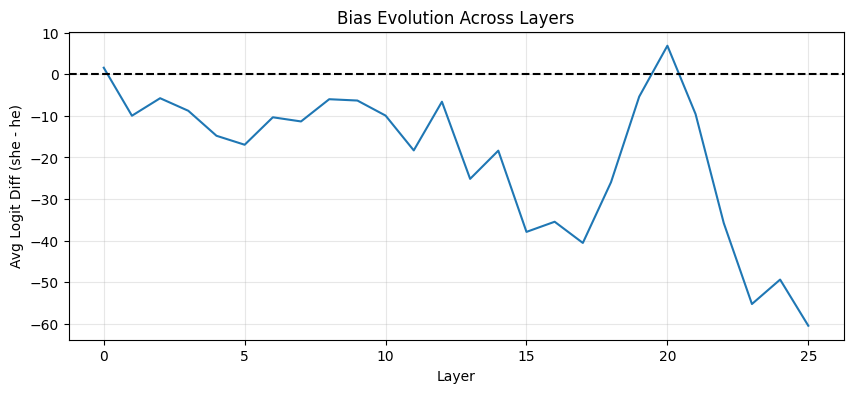

In [37]:
layer_biases = []
for layer in range(model.cfg.n_layers):
    resid = cache[f'blocks.{layer}.hook_resid_post']
    layer_logits = model.unembed(resid)[0]  # [seq_len, d_vocab]
    l_diff = layer_logits[:, she_id] - layer_logits[:, he_id]
    layer_biases.append(l_diff.mean().item())  # Avg over positions

plt.figure(figsize=(10, 4))
plt.plot(layer_biases)
plt.xlabel('Layer')
plt.ylabel('Avg Logit Diff (she - he)')
plt.title('Bias Evolution Across Layers')
plt.axhline(0, color='k', linestyle='--')
plt.grid(True, alpha=0.3)
plt.show()
